In [6]:
# Thoomas Goldman 2023
# DOLPHINN

import sys
import os
import matplotlib.pyplot as plt

#Get the absolute path of the current scriptf
current_path = os.path.dirname(os.path.abspath('__file__'))
dolphinn_path = os.path.join(current_path, '..')
sys.path.append(dolphinn_path)

from DOLPHINN.pinn import DOLPHINN 
from DOLPHINN.dynamics import TwoBodyProblemRadialNonDimensionalControl
from DOLPHINN.output_layers import InitialFinalStateLayer_Radial
from DOLPHINN.training import Scheduler, Restarter
from DOLPHINN.objectives import OptimalFuel
import DOLPHINN.plotting as plotting
import DOLPHINN.utils as utils

import numpy as np

In [2]:
mu = 1.32712440042e20 # SUN
m = 100 #Spacecraft mass
AU = 1.5e11 #EARTH-SUN
a = 10

rp = AU
ra = 1.5*AU

e = (ra - rp)/(ra + rp)
sma = (rp + ra)/2

# Initial state
r0 = AU
vr0 = 0
vt0 = np.sqrt(mu/r0)
initial_state = np.array([r0, vr0, vt0])


# Non dimensionalize
length_scale = AU
time_scale = AU / vt0

initial_state[:1] = initial_state[:1]/length_scale
initial_state[1:] = initial_state[1:]*time_scale/length_scale

# Integration times
period = 2*np.pi*np.sqrt(sma**3/mu)
t0 = 0
tfinal = period
N = 200

# Network architecture
input_dimension = 1
output_dimension = 5
neurons = 5
hidden_layers = 3
layer_size = [input_dimension] + [[neurons]*output_dimension] * hidden_layers + [output_dimension]

data = {"initial_state": initial_state,
        "mu": mu,
        "m": m,
        "a": a,
        "length_scale": length_scale,
        "time_scale": time_scale,
        "t0": t0,
        "tfinal": tfinal/time_scale,
        "architecture": layer_size,
        "activation": "sin",
        "N_train": N,
        "N_boundary": 2,
        "N_test": N,
        "sampler": "perturbed_uniform_tf"}

In [5]:
# Create problem
problem = DOLPHINN(data,
                    "TwoBodyProblemRadialNonDimensional",
                    output_transform = "InitialStateLayer")

schedule = Scheduler([(1e-2, 2000), (1e-3, 5000), (1e-4, 20000)])
problem.train(schedule)

[DOLPHINN] Using time-dependent random seed: 20230628233004

[DOLPHINN] Training with procedure: Scheduler

Compiling model...
'compile' took 0.001361 s

Training model...

Step      Train loss                        Test loss                         Test metric
0         [6.72e-01, 1.81e+00, 6.74e-01]    [6.78e-01, 1.84e+00, 6.79e-01]    []  
1000      [8.80e-06, 5.81e-06, 1.06e-05]    [7.37e-06, 5.87e-06, 1.06e-05]    []  
2000      [3.87e-06, 2.48e-06, 5.27e-06]    [3.41e-06, 2.48e-06, 5.13e-06]    []  

Best model at step 2000:
  train loss: 1.16e-05
  test loss: 1.10e-05
  test metric: []

'train' took 8.374073 s

Compiling model...
'compile' took 0.059964 s

Training model...

Step      Train loss                        Test loss                         Test metric
2000      [3.87e-06, 2.48e-06, 5.27e-06]    [3.41e-06, 2.48e-06, 5.13e-06]    []  
3000      [1.74e-06, 7.84e-07, 1.50e-06]    [1.34e-06, 7.67e-07, 1.38e-06]    []  
4000      [7.95e-07, 3.21e-07, 6.12e-07]    [6.09e-0

In [10]:
problem.store("../Data/test2/")

Saving loss history to ../Data/test2/loss.dat ...
Saving training data to ../Data/test2/train.dat ...
Saving test data to ../Data/test2/test.dat ...
[DOLPHINN] Saving config file to ../Data/test2/config


In [7]:
utils.print_config(problem.config) 


 ==================== Config Content ====================

----------Functions----------
dynamics                       TwoBodyProblemRadialNonDimensional
input_transform                NoneType
output_transform               InitialStateLayer
objective                      NoneType

----------Problem----------
initial_state                  [1.0, 0.0, 1.0]
mu                             1.32712440042e+20
m                              100
a                              10
length_scale                   150000000000.0
time_scale                     5042908.305393074
t0                             0
tfinal                         8.781018413800906

----------Network----------
architecture                   [1, [5, 5, 5, 5, 5], [5, 5, 5, 5, 5], [5, 5, 5, 5, 5], 5]
activation                     sin
sampler                        perturbed_uniform_tf
N_train                        200
N_boundary                     2
N_test                         200
seed                           20230

TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'

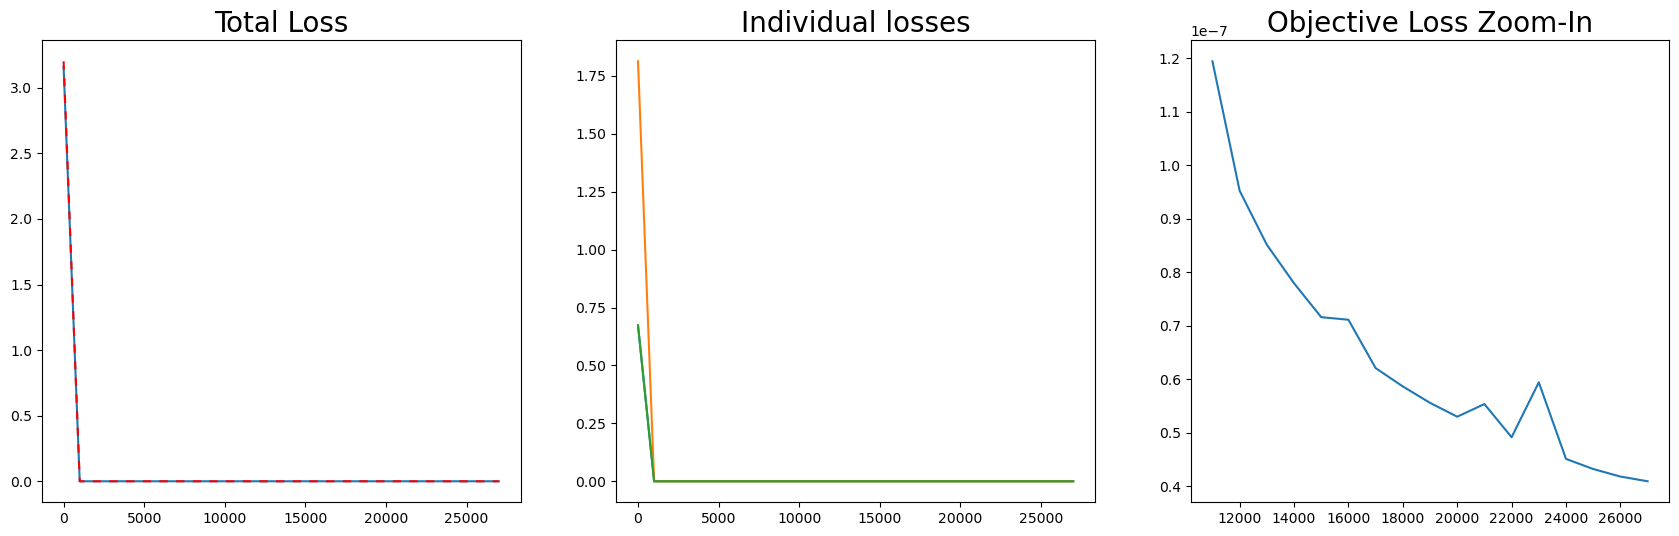

In [8]:
plotting.plot_loss(problem)